#### Uso de tracebacks para buscar errores

In [ ]:
open("/path/to/mars.jpg")

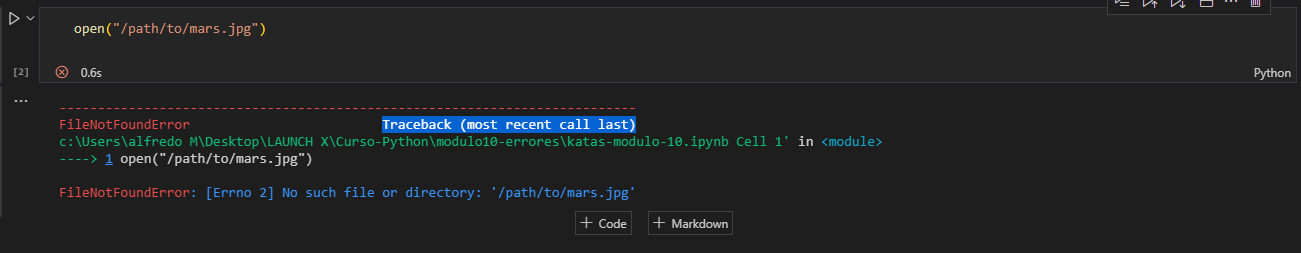

In [9]:
from IPython.display import Image
Image(filename="Modulo_10_Captura1.png")

Intenta crear un archivo de Python y asígnale el nombre open.py, con el contenido siguiente:

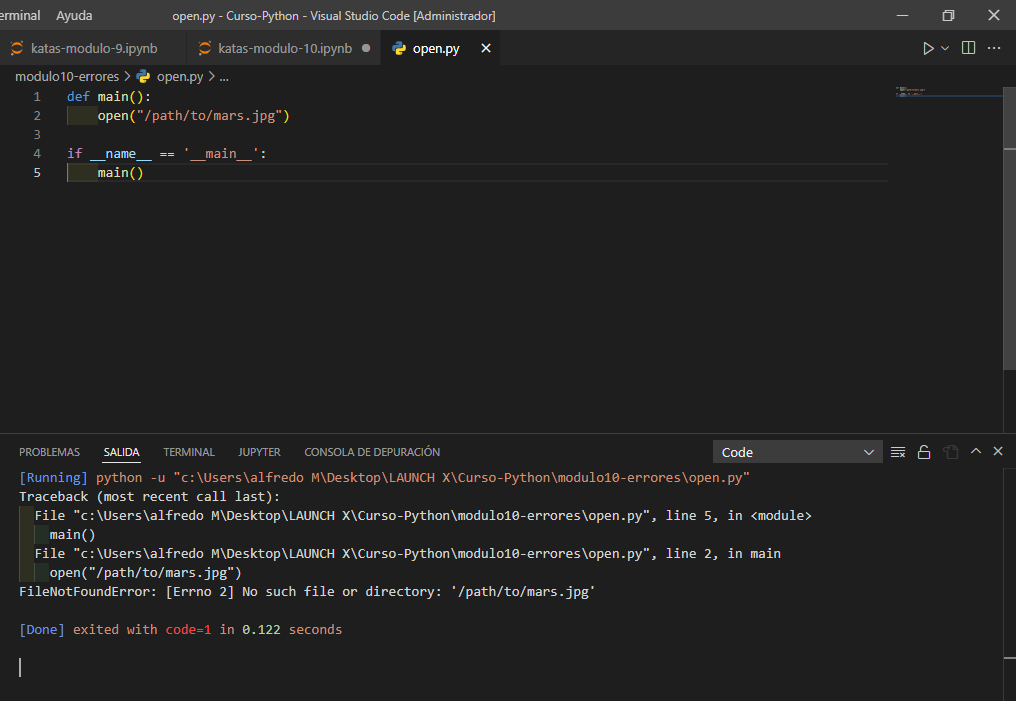

In [10]:
from IPython.display import Image
Image(filename="Modulo_10_Captura2.png")

Try y Except de los bloques

In [7]:
try:
    open('config.txt')
except FileNotFoundError:
        print("Couldn't find the config.txt file!")


Couldn't find the config.txt file!


Aunque es común un archivo que no existe, no es el único error que podemos encontrar. Los permisos de archivo no válidos pueden impedir la lectura de un archivo, incluso si este existe. Vamos a crear un archivo de Python denominado config.py. El archivo tiene código que busca y lee el archivo de configuración del sistema de navegación:

In [ ]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")


if __name__ == '__main__':
    main()

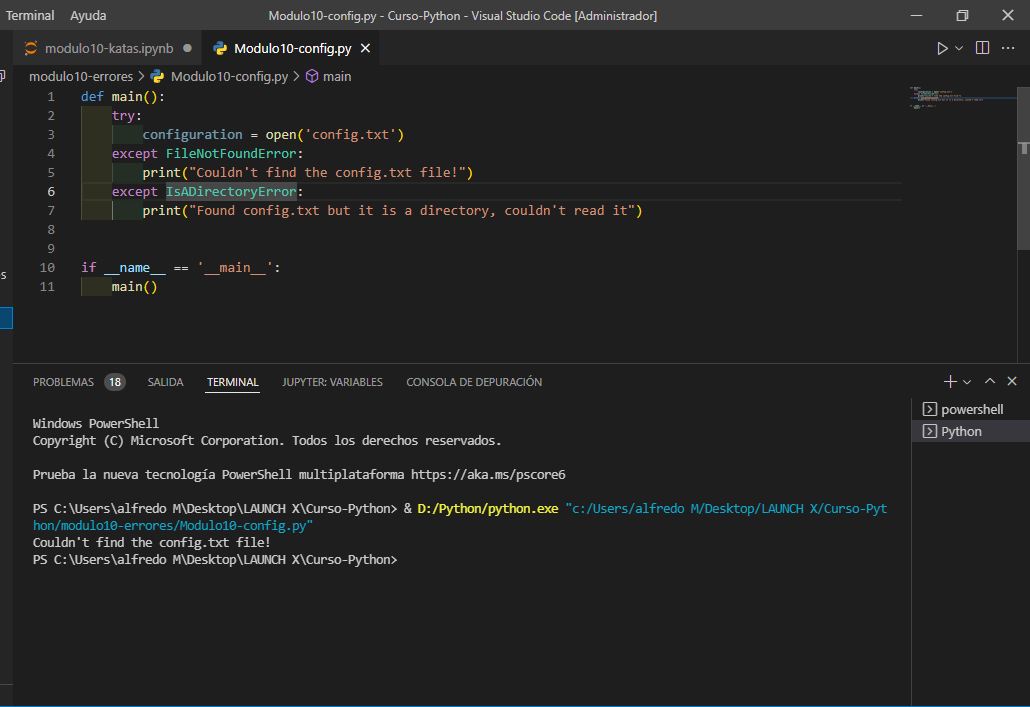

In [11]:
from IPython.display import Image
Image(filename="Modulo_10_Captura3.png")

Corrigiendo la excepcion 

In [12]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")

In [13]:
def main():
    try:
        configuration = open('config.txt')
    except FileNotFoundError:
        print("Couldn't find the config.txt file!")
    except IsADirectoryError:
        print("Found config.txt but it is a directory, couldn't read it")
    except (BlockingIOError, TimeoutError):
        print("Filesystem under heavy load, can't complete reading configuration file")

Si necesitas acceder al error asociado a la excepción, debes actualizar la línea except para incluir la palabra clave as. Esta técnica es práctica si una excepción es demasiado genérica y el mensaje de error puede ser útil:

In [16]:
try:
    open("mars.jpg")
except FileNotFoundError as err:
    print("got a problem trying to read the file:", err)

got a problem trying to read the file: [Errno 2] No such file or directory: 'mars.jpg'


Otra razón para usar esta técnica es acceder directamente a los atributos del error. Por ejemplo, si detecta una excepción OSError más genérica, que es la excepción primaria de FilenotFoundError y PermissionError, podemos diferenciarlas mediante el atributo .errno:

In [15]:
try:
    open("config.txt")
except OSError as err:
    if err.errno == 2:
        print("Couldn't find the config.txt file!")
    elif err.errno == 13:
        print("Found config.txt but couldn't read it")

Couldn't find the config.txt file!


Los astronautas limitan su uso de agua a unos 11 litros al día. Vamos a crear una función que, con base al número de astronautas, pueda calcular la cantidad de agua quedará después de un día o más:

In [14]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    return f"Total water left after {days_left} days is: {total_water_left} liters"

# pruebra: 5 astronautras, 100 litros de agua sobrante  y dos dias
water_left(5, 100, 2)

'Total water left after 2 days is: -10 liters'

podrías generar una excepción en la función water_left() para alertar de la condición de error:

In [ ]:
def water_left(astronauts, water_left, days_left):
    daily_usage = astronauts * 11
    total_usage = daily_usage * days_left
    total_water_left = water_left - total_usage
    if total_water_left < 0:
        raise RuntimeError(f"There is not enough water for {astronauts} astronauts after {days_left} days!")
    return f"Total water left after {days_left} days is: {total_water_left} liters"
#volviendo a probar el codigo actualizado

try:
    water_left(5, 100, 2)
except RuntimeError as err:
    alert_navigation_system(err)


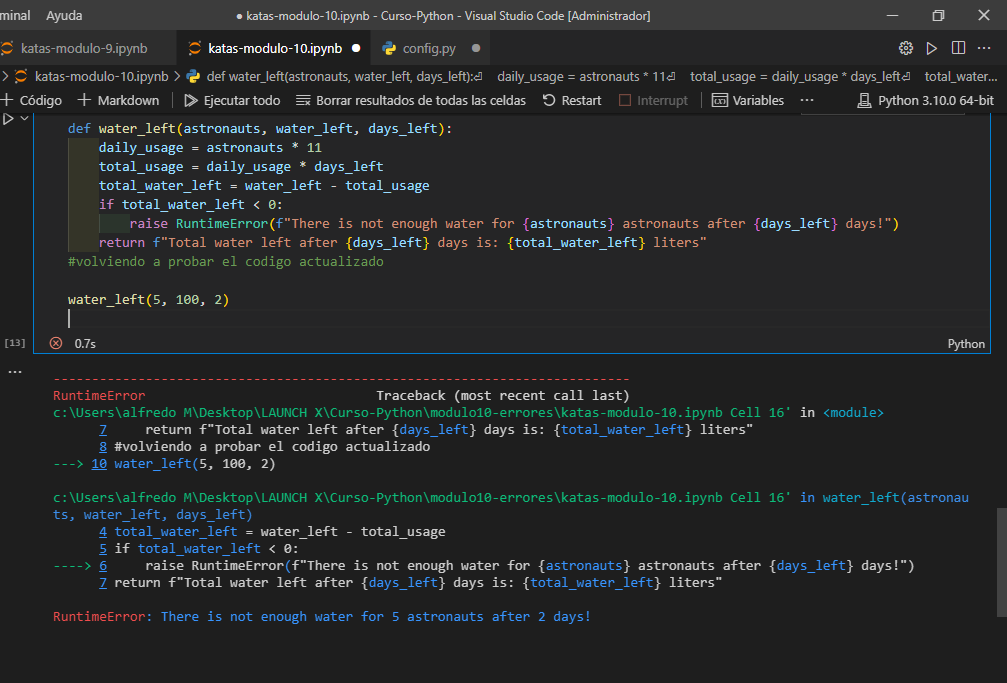

In [19]:
from IPython.display import Image
Image(filename="Modulo_10_Captura4.png")

Si usamos un try para alertar: 

In [ ]:
try:
    water_left(5, 100, 2)
except RuntimeError as err:
    alert_navigation_system(err)

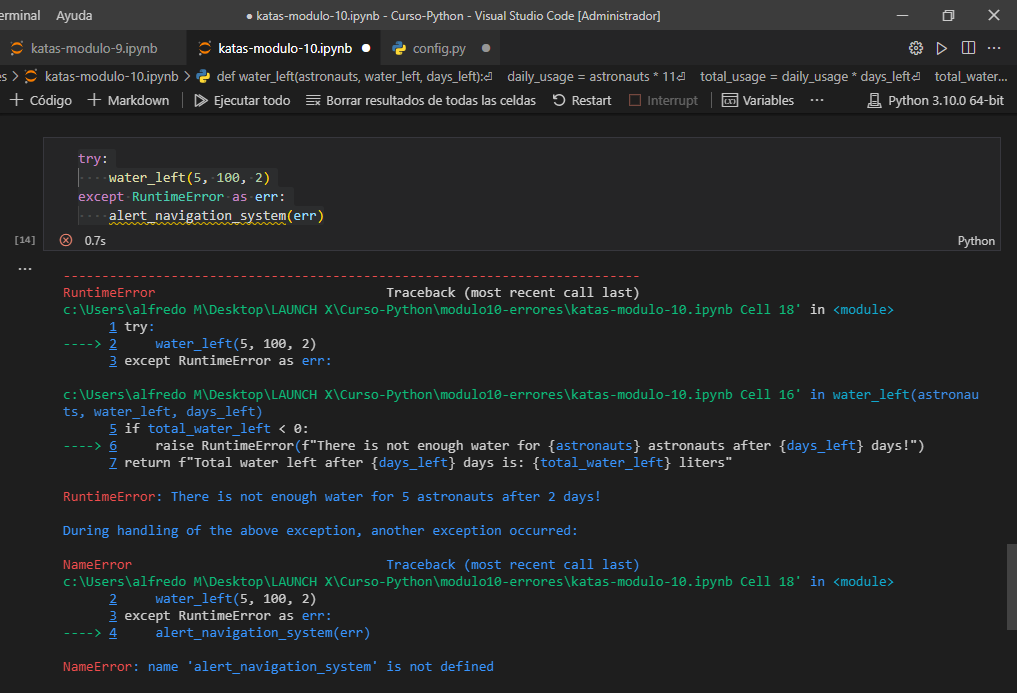

In [20]:
from IPython.display import Image
Image(filename="Modulo_10_Captura5.png")